

**importing libraries**



In [ ]:
#importing libraries

import pandas as pd

# Define the paths to the CSV files
csv_file_1 = '/content/0021801158-phi-vs-dal.csv'
csv_file_2 = '/content/0021801179-gsw-vs-lal.csv'
csv_file_3 = '/content/0021801174-uta-vs-phx.csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(csv_file_1)
df2 = pd.read_csv(csv_file_2)
df3 = pd.read_csv(csv_file_3)

**combining the csv**

In [ ]:
# Combine the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_file = 'combined.csv'
combined_df.to_csv(combined_csv_file, index=False)

In [ ]:
#reading the values from the combined csv
pd.read_csv('/content/combined.csv')

,actionNumber,actionType,clock,description,isFieldGoal,location,period,personId,playerName,playerNameI,...,teamTricode,videoAvailable,xLegacy,yLegacy,video_url,video_id,data_split_id,delexicalized_description,players_in_description,action_type_code
0,4.0 </> 7.0 </> 8.0,Jump Ball </> Missed Shot </> Defensive Rebound,PT12M00.00S </> PT11M51.00S </> PT11M48.00S,Jump Ball Powell vs. Bolden: Tip to Redick </>...,0.0 </> 1.0 </> 0.0,h </> v </> h,1.0 </> 1.0 </> 1.0,203939.0 </> 1628413.0 </> 201584.0,Powell </> Bolden </> Lee,D. Powell </> J. Bolden </> C. Lee,...,DAL </> PHI </> DAL,1.0 </> 1.0 </> 1.0,0.0 </> -167.0 </> 0.0,0.0 </> 177.0 </> 0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,1343 </> 1344 </> 1345,train-1343 </> train-1344 </> train-1345,Jump Ball PLAYER203939 vs. PLAYER1628413: Tip ...,PLAYER203939 PLAYER1628413 PLAYER200755 </> PL...,action41 </> action109 </> action135
1,9.0 </> 10.0,Missed Shot </> Defensive Rebound,PT11M38.00S </> PT11M36.00S,MISS Nowitzki 21' Turnaround Jump Shot </> Bol...,1.0 </> 0.0,h </> v,1.0 </> 1.0,1717.0 </> 1628413.0,Nowitzki </> Bolden,D. Nowitzki </> J. Bolden,...,DAL </> PHI,1.0 </> 1.0,-138.0 </> 0.0,158.0 </> 0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,1346 </> 1347,train-1346 </> train-1347,MISS PLAYER1717 21' Turnaround Jump Shot </> P...,PLAYER1717 </> PLAYER1628413,action133 </> action135
2,11.0 </> 12.0,Missed Shot </> Defensive Rebound,PT11M30.00S </> PT11M27.00S,MISS Ennis III 3PT Jump Shot </> Jackson REBOU...,1.0 </> 0.0,v </> h,1.0 </> 1.0,203516.0 </> 1628382.0,Ennis III </> Jackson,J. Ennis III </> J. Jackson,...,PHI </> DAL,1.0 </> 1.0,226.0 </> 0.0,51.0 </> 0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,1348 </> 1349,train-1348 </> train-1349,MISS PLAYER203516 3PT Jump Shot </> PLAYER1628...,PLAYER203516 </> PLAYER1628382,action109 </> action135
3,14.0,Made Shot,PT11M10.00S,Powell 3' Alley Oop Layup (2 PTS) (Brunson 1 AST),1.0,h,1.0,203939.0,Powell,D. Powell,...,DAL,1.0,-29.0,4.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,1350,train-1350,PLAYER203939 3' Alley Oop Layup (PLAYER1628973...,PLAYER203939 PLAYER1628973,action43
4,16.0 </> 17.0,Missed Shot </> Defensive Rebound,PT11M00.00S </> PT10M58.00S,MISS Simmons 3' Driving Layup </> Lee REBOUND ...,1.0 </> 0.0,v </> h,1.0 </> 1.0,1627732.0 </> 201584.0,Simmons </> Lee,B. Simmons </> C. Lee,...,PHI </> DAL,1.0 </> 1.0,-33.0 </> 0.0,-2.0 </> 0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,1351 </> 1352,train-1351 </> train-1352,MISS Simmons 3' Driving Layup </> PLAYER201584...,</> PLAYER201584,action99 </> action135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,610.0 </> 611.0,Missed Shot </> Defensive Rebound,PT00M59.50S </> PT00M56.60S,MISS Fredette 22' Step Back Jump Shot </> Gobe...,1.0 </> 0.0,h </> v,4.0 </> 4.0,202690.0 </> 203497.0,Fredette </> Gobert,J. Fredette </> R. Gobert,...,PHX </> UTA,1.0 </> 1.0,-112.0 </> 0.0,194.0 </> 0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,10971 </> 10972,train-10971 </> train-10972,MISS PLAYER202690 22' Step Back Jump Shot </> ...,PLAYER202690 </> PLAYER203497,action126 </> action135
732,612.0,Made Shot,PT00M41.40S,Gobert Cutting Dunk Shot (17 PTS) (Ingles 8 AST),1.0,v,4.0,203497.0,Gobert,R. Gobert,...,UTA,1.0,3.0,-1.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,10973,train-10973,PLAYER203497 Cutting Dunk Shot (PLAYER204060 AST),PLAYER203497 PLAYER204060,action44
733,614.0,Turnover,PT00M29.20S,Jackson Out of Bounds - Bad Pass Turnover Turn...,0.0,h,4.0,1628367.0,Jackson,J. Jackson,...,PHX,1.0,0.0,0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,10974,train-10974,PLAYER1628367 Out of Bounds - Bad Pass Turnove...,PLAYER1628367,action157
734,615.0,Foul,PT00M21.90S,Bridges P.FOUL (P5.PN) (G.Petraitis),0.0,h,4.0,1628969.0,Bridges,M. Bridges,...,PHX,1.0,0.0,0.0,https://videos.nba.com/nba/pbp/media/2019/04/0...,10975,train-10975,PLAYER1628969 P.FOUL,PLAYER1628969,action16


In [ ]:
#printing the total number of rows
print("Number of rows:", len(combined_df))

Number of rows: 736


**downloading videos from csv**

In [ ]:
# downloading videos from the csv
import csv
import os
import re
from urllib.request import urlretrieve
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the subfolder in Google Drive for downloaded videos
drive_video_folder = "/content/drive/My Drive/Downloaded_videos"

# Create the video folder in Google Drive if it doesn't exist
if not os.path.exists(drive_video_folder):
    os.makedirs(drive_video_folder)

# Open the CSV file in read and write mode with newline handling
with open('combined.csv', 'r+', newline='') as csvfile:

    # Create reader object
    reader = csv.reader(csvfile)

    # Read all rows into a list data
    data = list(reader)

    # Create writer object (after reading data)
    writer = csv.writer(csvfile)  # Moved writer creation here

    # Check if "video_dir_path" is in the header and create it if not
    if 'video_dir_path' not in data[0]:
        data[0].append('video_dir_path')
        writer.writerow(data[0])  # Write updated header with new column

    # Loop through rows starting from the second row (skip header)
    for idx, row in enumerate(data[1:]):
        video_url = row[21]  # Assuming video_url is at index 21

        # Extract filename from the cleaned video_url
        filename = video_url.split('/')[-1]

        # Define the full path in Google Drive
        video_path = os.path.join(drive_video_folder, filename)

        # Check if video file already exists
        if os.path.isfile(video_path):
            print(f"Video {filename} already exists, skipping download.")
            row.append(video_path)  # Update row with existing path
        else:
            try:
                # Remove leading/trailing spaces and any extra spaces within the URL
                video_url = video_url.strip()
                video_url = re.sub(r'\s+', '', video_url)

                # Download video
                urlretrieve(video_url, video_path)

                # Update the row with downloaded video path
                row.append(video_path)

                # Move the pointer to the beginning (overwrite header and row)
                csvfile.seek(0, os.SEEK_SET)
                writer.writerow(data[0])  # Write header again
                writer.writerow(row)      # Write updated row

                # Move the pointer back to the next row position
                csvfile.seek((idx + 2) * len(csvfile.readline()), os.SEEK_SET)
                print(f"Downloaded video: {filename}")
            except Exception as e:
                print(f"Error downloading video {filename}: {e}")

print("Video download process completed.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error downloading video 49ae4ca1-d538-3389-064a-394d78bd5557_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video dfaca7e1-651f-e961-7984-91d3610bc55c_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video 29fdc20f-3105-7154-9332-c9fc33a392da_1280x720.mp4: HTTP Error 403: Forbidden
Video 7ec07b99-42f5-50c1-376f-144c73539077_1280x720.mp4 already exists, skipping download.
Error downloading video 51ca2937-814e-4328-82b5-b9b9b3759176_1280x720.mp4: HTTP Error 403: Forbidden
Video 6bdeda17-1437-d2ca-714b-ead44dfd49ec_1280x720.mp4 already exists, skipping download.
Video 1d7d5e5f-2e03-ba79-d9f8-9c81ae529819_1280x720.mp4 already exists, skipping download.
Error downloading video a1aee6af-73e8-82c4-0e55-ab58bebfd248_1280x720.mp4: HTTP Error 403: Forbidden
Video 5f0c77bf-e75f-383a-7d4d-c2d9182bae3b_1280x720.mp4 already exists, skipping download.
Er

**saving the downloaded videos into a folder named 'Downloaded_videos' in the drive**

In [ ]:
#saving the downloaded videos into the drive
import csv
import os
import re
from urllib.request import urlretrieve
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the subfolder in Google Drive for downloaded videos
drive_video_folder = "/content/drive/MyDrive/Downloaded_videos"

# Create the video folder in Google Drive if it doesn't exist
if not os.path.exists(drive_video_folder):
    os.makedirs(drive_video_folder)

# Open the combined CSV file
with open('combined.csv', 'r', newline='') as csvfile:
    # Create reader object
    reader = csv.reader(csvfile)
    # Read all rows into a list data
    data = list(reader)

# Prepare a list to store rows with downloaded video paths
new_csv_data = [data[0]]  # Start with the header

# Check if "video_dir_path" is in the header and add it if not
if 'video_dir_path' not in data[0]:
    data[0].append('video_dir_path')

# Loop through rows starting from the second row (skip header)
for idx, row in enumerate(data[1:]):
    video_url = row[21]  # Assuming video_url is at index 21

    # Extract filename from the cleaned video_url
    filename = video_url.split('/')[-1]

    # Define the full path in Google Drive
    video_path = os.path.join(drive_video_folder, filename)

    # Check if video file already exists
    if os.path.isfile(video_path):
        print(f"Video {filename} already exists, skipping download.")
        row.append(video_path)  # Update row with existing path
        new_csv_data.append(row)  # Add to new CSV data
    else:
        try:
            # Remove leading/trailing spaces and any extra spaces within the URL
            video_url = video_url.strip()
            video_url = re.sub(r'\s+', '', video_url)

            # Download video
            urlretrieve(video_url, video_path)

            # Update the row with downloaded video path
            row.append(video_path)
            new_csv_data.append(row)  # Add to new CSV data

            print(f"Downloaded video: {filename}")
        except Exception as e:
            print(f"Error downloading video {filename}: {e}")

# Create a new CSV file with the same video URLs
with open('new_combined.csv', 'w', newline='') as new_csvfile:
    writer = csv.writer(new_csvfile)
    writer.writerows(new_csv_data)

print("Video download process completed and new CSV file created.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error downloading video 49ae4ca1-d538-3389-064a-394d78bd5557_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video dfaca7e1-651f-e961-7984-91d3610bc55c_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video 29fdc20f-3105-7154-9332-c9fc33a392da_1280x720.mp4: HTTP Error 403: Forbidden
Video 7ec07b99-42f5-50c1-376f-144c73539077_1280x720.mp4 already exists, skipping download.
Error downloading video 51ca2937-814e-4328-82b5-b9b9b3759176_1280x720.mp4: HTTP Error 403: Forbidden
Video 6bdeda17-1437-d2ca-714b-ead44dfd49ec_1280x720.mp4 already exists, skipping download.
Video 1d7d5e5f-2e03-ba79-d9f8-9c81ae529819_1280x720.mp4 already exists, skipping download.
Error downloading video a1aee6af-73e8-82c4-0e55-ab58bebfd248_1280x720.mp4: HTTP Error 403: Forbidden
Video 5f0c77bf-e75f-383a-7d4d-c2d9182bae3b_1280x720.mp4 already exists, skipping download.
Er

IndexError: list index out of range

**downloading the frames and saving the extracted frames into the drive**

In [ ]:
# downloading the frames and saving the extracted frames into the drive
import csv
import os
import re
from urllib.request import urlretrieve
from google.colab import drive
import cv2

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define paths
drive_video_folder = "/content/drive/MyDrive/Downloaded_videos"
drive_frames_folder = "/content/drive/MyDrive/Extracted_frames"

if not os.path.exists(drive_video_folder):
    os.makedirs(drive_video_folder)

if not os.path.exists(drive_frames_folder):
    os.makedirs(drive_frames_folder)

# Step 3: Download videos from CSV
with open('combined.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# Prepare a list to store rows with downloaded video paths
new_csv_data = [data[0]]  # Start with the header

# Check if "video_dir_path" is in the header and add it if not
if 'video_dir_path' not in data[0]:
    data[0].append('video_dir_path')

# Loop through rows starting from the second row (skip header)
for idx, row in enumerate(data[1:]):
    if len(row) > 21:
        video_url = row[21]  # Assuming video_url is at index 21

        # Extract filename from the cleaned video_url
        filename = video_url.split('/')[-1]

        # Define the full path in Google Drive
        video_path = os.path.join(drive_video_folder, filename)

        # Check if video file already exists
        if os.path.isfile(video_path):
            print(f"Video {filename} already exists, skipping download.")
            row.append(video_path)  # Update row with existing path
            new_csv_data.append(row)  # Add to new CSV data
        else:
            try:
                # Remove leading/trailing spaces and any extra spaces within the URL
                video_url = video_url.strip()
                video_url = re.sub(r'\s+', '', video_url)

                # Download video
                urlretrieve(video_url, video_path)

                # Update the row with downloaded video path
                row.append(video_path)
                new_csv_data.append(row)  # Add to new CSV data

                print(f"Downloaded video: {filename}")
            except Exception as e:
                print(f"Error downloading video {filename}: {e}")
    else:
        print(f"Skipping row {idx+1} due to insufficient columns")

# Create a new CSV file with the same video URLs
with open('new_combined.csv', 'w', newline='') as new_csvfile:
    writer = csv.writer(new_csvfile)
    writer.writerows(new_csv_data)

print("Video download process completed and new CSV file created.")

# Step 4: Extract frames from videos
for video_file in os.listdir(drive_video_folder):
    video_path = os.path.join(drive_video_folder, video_file)
    video_name = os.path.splitext(video_file)[0]
    video_frames_folder = os.path.join(drive_frames_folder, video_name)
    if not os.path.exists(video_frames_folder):
        os.makedirs(video_frames_folder)

    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    if not cap.isOpened():
        print(f"Error opening video file {video_file}")
        continue

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = f"frame_{frame_count:04d}.jpg"
        frame_path = os.path.join(video_frames_folder, frame_filename)
        cv2.imwrite(frame_path, frame)

        frame_count += 1

    cap.release()
    print(f"Extracted {frame_count} frames from video {video_file}")

print("Frame extraction process completed.")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error downloading video 49ae4ca1-d538-3389-064a-394d78bd5557_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video dfaca7e1-651f-e961-7984-91d3610bc55c_1280x720.mp4: HTTP Error 403: Forbidden
Error downloading video 29fdc20f-3105-7154-9332-c9fc33a392da_1280x720.mp4: HTTP Error 403: Forbidden
Video 7ec07b99-42f5-50c1-376f-144c73539077_1280x720.mp4 already exists, skipping download.
Error downloading video 51ca2937-814e-4328-82b5-b9b9b3759176_1280x720.mp4: HTTP Error 403: Forbidden
Video 6bdeda17-1437-d2ca-714b-ead44dfd49ec_1280x720.mp4 already exists, skipping download.
Video 1d7d5e5f-2e03-ba79-d9f8-9c81ae529819_1280x720.mp4 already exists, skipping download.
Error downloading video a1aee6af-73e8-82c4-0e55-ab58bebfd248_1280x720.mp4: HTTP Error 403: Forbidden
Video 5f0c77bf-e75f-383a-7d4d-c2d9182bae3b_1280x720.mp4 already exists, skipping download.
Er

**accessing  a  particular frame from a video**

Successfully accessed frame 5 of video drive/My Drive/Downloaded_videos/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720.mp4.


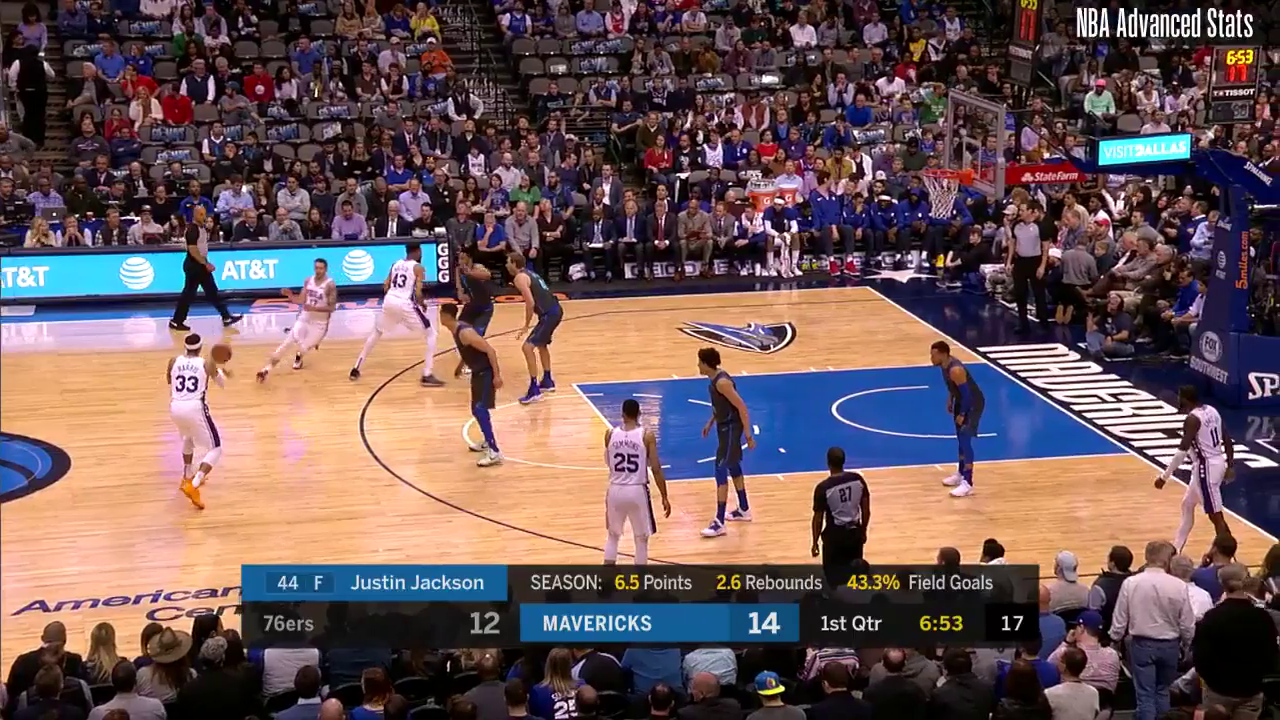

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Define the video file and frame number to access
video_file = 'drive/My Drive/Downloaded_videos/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720.mp4'
frame_number = 5  # for example, to access the 10th frame

# Construct the path to the video file
video_path = video_file  # Assuming video_file already contains the correct path

# Capture the video
cap = cv2.VideoCapture(video_path)

# Set the video frame to the specified frame number
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = cap.read()

if ret:
    # The frame was read successfully
    print(f"Successfully accessed frame {frame_number} of video {video_file}.")

    # Display the frame using cv2_imshow
    cv2_imshow(frame)

else:
    # The frame could not be read
    print(f"Error: Failed to access frame {frame_number} of video {video_file}.")

# Release the video capture object
cap.release()


**extracted, resized and normalized the frames from a single video and saved into the drive**

In [ ]:
import cv2
import os

# Define the video file and the output folder for frames
video_file = 'drive/My Drive/Downloaded_videos/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720.mp4'
drive_frames_folder = 'drive/My Drive/processed_images'
video_name = os.path.splitext(os.path.basename(video_file))[0]
video_frames_folder = os.path.join(drive_frames_folder, video_name)

# Create the directory to save frames if it does not exist
if not os.path.exists(video_frames_folder):
    os.makedirs(video_frames_folder)

# Desired size for resizing the frames
desired_width = 640
desired_height = 360

cap = cv2.VideoCapture(video_file)
frame_count = 0
extracted_frame_count = 0

if not cap.isOpened():
    print(f"Error opening video file {video_file}")
else:
    # Get the original FPS of the video
    original_fps = cap.get(cv2.CAP_PROP_FPS)

    # Desired FPS for extraction
    desired_fps = 20
    frame_interval = int(original_fps // desired_fps)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Convert BGR to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Resize the frame
        resized_frame = cv2.resize(rgb_frame, (desired_width, desired_height))

        # Save the frame as an image
        frame_filename = f"frame_{extracted_frame_count:04d}.jpg"
        frame_path = os.path.join(video_frames_folder, frame_filename)
        cv2.imwrite(frame_path, resized_frame)
        extracted_frame_count += 1

    frame_count += 1

cap.release()
print(f"Extracted, resized, and saved {extracted_frame_count} frames as images from video {video_file}")


Extracted, resized, and saved 227 frames as images from video drive/My Drive/Downloaded_videos/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720.mp4


In [ ]:
import cv2
import os

# Define the video file and the output folder for frames
video_file = 'drive/My Drive/Downloaded_videos/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720.mp4'
drive_frames_folder = 'drive/My Drive/processed_images'
video_name = os.path.splitext(os.path.basename(video_file))[0]
video_frames_folder = os.path.join(drive_frames_folder, video_name)

# Create the directory to save frames if it does not exist
if not os.path.exists(video_frames_folder):
    os.makedirs(video_frames_folder)

# Desired size for resizing the frames
desired_width = 640
desired_height = 360

cap = cv2.VideoCapture(video_file)
frame_count = 0
extracted_frame_count = 0

if not cap.isOpened():
    print(f"Error opening video file {video_file}")
else:
    # Get the original FPS of the video
    original_fps = cap.get(cv2.CAP_PROP_FPS)

    # Desired FPS for extraction
    desired_fps = 20
    frame_interval = int(original_fps // desired_fps)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Convert BGR to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Resize the frame
        resized_frame = cv2.resize(rgb_frame, (desired_width, desired_height))

        # Save the frame as an image
        frame_filename = f"frame_{extracted_frame_count:04d}.jpg"
        frame_path = os.path.join(video_frames_folder, frame_filename)
        cv2.imwrite(frame_path, resized_frame)
        print(f"Saved frame {extracted_frame_count}: {frame_path}")
        extracted_frame_count += 1

    frame_count += 1

cap.release()
print(f"Extracted, resized, and saved {extracted_frame_count} frames as images from video {video_file}")


Saved frame 0: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0000.jpg
Saved frame 1: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0001.jpg
Saved frame 2: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0002.jpg
Saved frame 3: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0003.jpg
Saved frame 4: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0004.jpg
Saved frame 5: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0005.jpg
Saved frame 6: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0006.jpg
Saved frame 7: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0007.jpg
Saved frame 8: drive/My Drive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0008.jpg
Saved frame 9: drive/My Driv

**Person detection using YOLO**

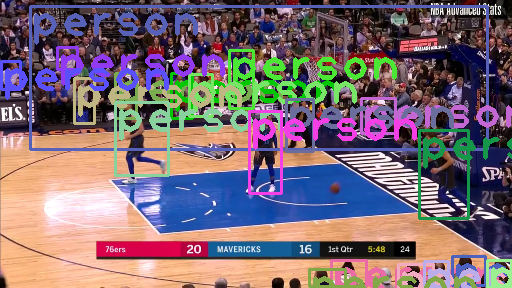

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/yolo/yolov3.weights", "/content/drive/MyDrive/yolo/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
#img = cv2.imread("/content/drive/MyDrive/processed_images/ffb63db5-25a4-9ec0-c8af-885104769433_1280x720/frame_0000.jpg")
#img = cv2.imread("/content/drive/MyDrive/Extracted_frames/1d05ab5f-5c96-b32d-b6d7-993c7fe8ed5e_1280x720/frame_0000.jpg")
img = cv2.imread("/content/drive/MyDrive/Extracted_frames/a05c67f8-1a09-5917-2161-fb16e9e1bb53_1280x720/frame_0545.jpg")

img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and class_id == 0:  # Filter only persons
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

cv2_imshow(img)


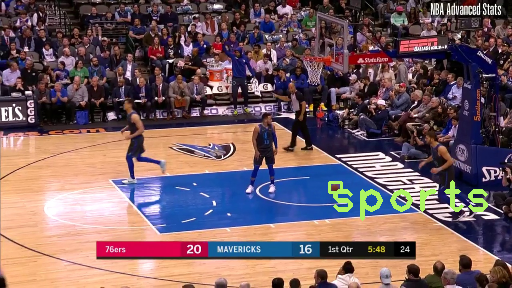

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO
net = cv2.dnn.readNet("/yolov3.weights", "/yolov3.cfg")
classes = []
with open("/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
img = cv2.imread("/content/drive/MyDrive/Extracted_frames/a05c67f8-1a09-5917-2161-fb16e9e1bb53_1280x720/frame_0545.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3 and class_id == 32:  # Filter only sports balls
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

cv2_imshow(img)


**Person and basketball detection using YOLO**

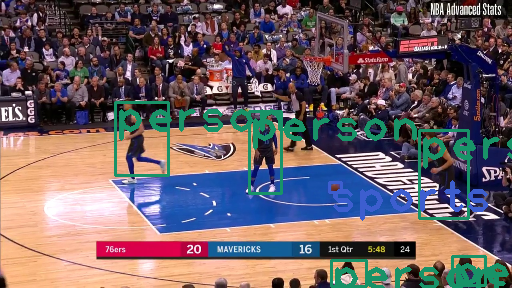

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO
net = cv2.dnn.readNet("/yolov3.weights", "/yolov3.cfg")
classes = []
with open("/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Class IDs for person and sports ball
person_id = 0
sports_ball_id = 32

# Load image
img = cv2.imread("/content/drive/MyDrive/Extracted_frames/a05c67f8-1a09-5917-2161-fb16e9e1bb53_1280x720/frame_0545.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.827 and (class_id == person_id or class_id == sports_ball_id):  # Filter persons and sports balls
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

cv2_imshow(img)


In [ ]:
import cv2
import os

def extract_frames(video_path, output_folder, frames_per_second):
    """
    Extract frames from a video file at a specified rate and save them as images.

    Args:
    video_path : Path to the video file.
    output_folder : Folder where frames will be saved.
    frames_per_second : Number of frames to extract per second.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created output folder: {output_folder}")

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file: {video_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps / frames_per_second)

    count = 0
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            frame_path = f"{output_folder}/frame_{frame_count:04d}.jpg"
            success = cv2.imwrite(frame_path, frame)
            if success:
                print(f"Frame {frame_count} saved: {frame_path}")
            else:
                print(f"Error: Could not save frame {frame_count}")
            frame_count += 1
        count += 1

    cap.release()
    print(f"Total frames extracted: {frame_count}")

video_path = '/content/drive/MyDrive/Downloaded_videos/00af110e-16fe-1b86-12dd-e4da6b89f744_1280x720.mp4'
output_folder = '/content/drive/MyDrive/sample_frames/new_fldr'
frames_per_second = 1  # Desired frames per second
extract_frames(video_path, output_folder, frames_per_second)


Created output folder: /content/drive/MyDrive/sample_frames/new_fldr
Frame 0 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0000.jpg
Frame 1 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0001.jpg
Frame 2 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0002.jpg
Frame 3 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0003.jpg
Frame 4 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0004.jpg
Frame 5 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0005.jpg
Frame 6 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0006.jpg
Frame 7 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0007.jpg
Frame 8 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0008.jpg
Frame 9 saved: /content/drive/MyDrive/sample_frames/new_fldr/frame_0009.jpg
Total frames extracted: 10


**Vidoe Captioning using BLIP**

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import os

# Define function to generate text descriptions
def generate_text_descriptions(frames_folder, max_new_tokens=50):
    # Load the processor and model
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    descriptions = []

    # Iterate over each image frame in the folder
    for frame_name in os.listdir(frames_folder):
        frame_path = os.path.join(frames_folder, frame_name)
        image = Image.open(frame_path).convert("RGB")

        # Process the image and generate the description
        inputs = processor(images=image, return_tensors="pt")
        outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
        description = processor.decode(outputs[0], skip_special_tokens=True)

        descriptions.append(description)

    return descriptions

frames_folder = '/content/drive/MyDrive/sample_frames/new_fldr'
descriptions = generate_text_descriptions(frames_folder)
print(descriptions)

['a basketball game with a player shooting the ball', 'a basketball game with a player shooting the ball', 'a basketball game with a player in the middle of the court', 'a basketball game with a player shooting the ball', 'the lakers game is going on with the lakerss', 'a basketball game with a player shooting the ball', 'a basketball game with a player in the middle of the court', 'a basketball game with a player in the middle of the court', 'a basketball player is standing in front of a crowd', 'a basketball player is about to make a play']


In [ ]:
unique_descriptions = set(descriptions)

for description in unique_descriptions:
    print(description)

the knicks's carmel, left, and the knicks's carmel
a basketball player is conging another player
a basketball player is running on the court
a basketball player is being a hit by another player
a basketball player is standing in front of a crowd
a basketball game with a player shooting the ball
the nba game is going on with the ball
the suns's carmel williams is the best player in the nba
a basketball player is about to make a play
the celtics's game winning shot in the nba playoffs
a basketball player is running to the basket
a basketball player is in the middle of the court
the lakers game is going on with the lakerss
a basketball game with a player in the middle of the court
a basketball game with a player on the court
a basketball game with a crowd watching
a basketball player is walking on the court
a basketball player is running down the court
a basketball player is hugging another player
the suns's russell williams is the best player in the nba
